<a href="https://colab.research.google.com/github/SloBluck/SimuladorAnalogoDigital/blob/main/Conversi%C3%B3n_an%C3%A1logo_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log,pi

## Funciones

In [103]:
def tren_impulso(t):
  return (t%1==0)*1
def binary(lon,num):
    i,binario=0,0
    while num>=1:
        binario+=(num%2)*(10**i)
        i+=1
        num//=2
    return str(binario).zfill(lon)
def decimal(num):
    dec,i=0,0
    while (num>=1):
        d=num%10
        num=num//10
        dec+=d*pow(2,i)
        i=i+1
    return dec
def meadthread(Vmin,Vmax,M,valM):
  L=int(2**M)
  intq=(Vmax-Vmin)/L
  valQ,valC=[],[]
  x,y=[],[]
  for i in range(-int(L/2),1+int(L/2)):
      x.append(intq*(i-1/2))
      y.append(i*intq)
  for i in range(len(valM)):
      for j in range(1,len(x)):
          if x[j-1]<valM[i]<=x[j]:
              valQ.append(y[j-1])
              valC.append(binary(M,int(j+(y[j-1]<0)*(L/2-1)-(y[j-1]>=0)*((L+1)/2))))
  return valQ,valC,x,y
def graphmead(Trama,L,intq):
  isbinary=True
  xtrama=np.linspace(0,1,len(Trama))
  mx=[]
  for i in Trama:
    i=int(i)
    if isbinary:
      i=decimal(i)
    mx.append(intq*i) if i<L/2 else mx.append(-(L-i)*intq)
  plt.stem(xtrama,mx)
def x_sigma(t,Ts):
  return tren_impulso(t/Ts)
def diganalogo(L,intq,signal_converter):
  xtrama=np.round(np.linspace(0,1+a_t,len(valC)),2)
  dist=(xtrama[1]-xtrama[0])
  for i in range(1,len(newvalc)+1):
    plt.plot([xtrama[i-1]-(i>1)*(dist/2),xtrama[i-1]+dist/2],[newvalc[i-1],newvalc[i-1]],color="red")
    if i<len(valC):
      plt.plot([xtrama[i-1]+dist/2,xtrama[i-1]+dist/2],[newvalc[i-1],newvalc[i]],color="red")
  plt.plot(t,xc(t),color="blue")
  if len(signal_muestreada)==len(newvalc):
    print("Error de cuantificación - promedio:",np.mean(signal_muestreada-newvalc))

# Conversor

In [59]:
def xc(t):
  return 2*np.cos(3*t)+3*np.cos(6*t)

In [60]:
a_t=10e-3
Ts=1/18
T=1
fs=1/Ts
t=np.round(np.arange(0,1+a_t,a_t),2)

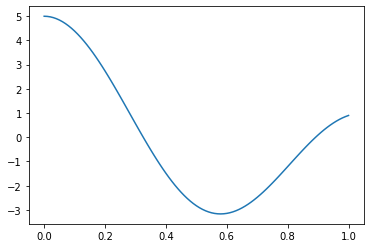

In [61]:
plt.plot(t,xc(t))

## Muestreador

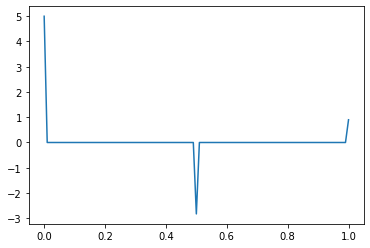

In [62]:
signal_muestreada=xc(t)*x_sigma(t,Ts)
plt.plot(t,signal_muestreada)
signal_muestreada=xc(t)[np.where(x_sigma(t,Ts)==np.max(x_sigma(t,Ts)))]

## Cuantizador

In [90]:
Vmin,Vmax,r=-6,6,7

Q = [4.96875, -2.8125, 0.9375]
C = ['0110101', '1100010', '0001010']


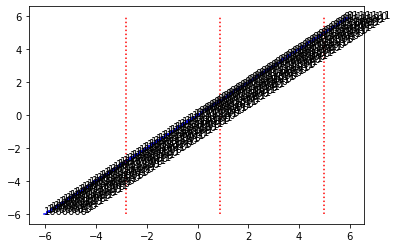

In [91]:
valM=signal_muestreada
valQ,valC,x,y=meadthread(Vmin,Vmax,r,valM)
for i in range(1,2**r+1):
    plt.plot([x[i-1],x[i]],[y[i-1],y[i-1]],color="blue")
    plt.annotate(binary(r,int(i+(y[i-1]<0)*(int(2**r)/2-1)-(y[i-1]>=0)*((int(2**r)+1)/2))),(x[i-1],y[i-1]))
    if i!=(2**r):
        plt.plot([x[i],x[i]],[y[i-1],y[i]],color="blue")
for i in range(len(valM)):
   plt.plot([valM[i],valM[i]],[min(y),max(y)],linestyle='dotted',color="red")
print("Q =",valQ)
print("C =",valC)

## Codificación

<ipython-input-58-382e2615f49d>:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(xtrama,mx)


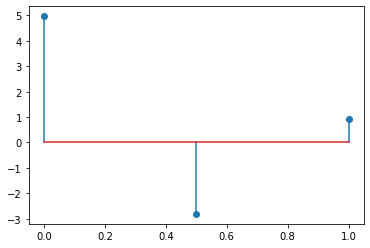

In [92]:
graphmead(valC,int(2**r),(Vmax-Vmin)/int(2**r))

## Señal digitalizada

Error de cuantificación - promedio: -0.007242406571907889


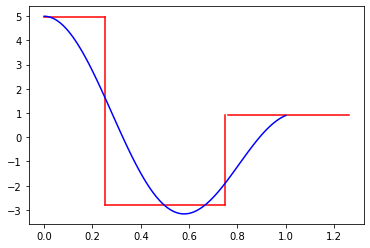

In [104]:
L=int(2**r)
intq=(Vmax-Vmin)/L
newvalc=np.array([decimal(int(i)) for i in valC])
newvalc=((newvalc>=L/2)*(newvalc-L)+(newvalc<L/2)*(newvalc))*intq
diganalogo(L,intq,newvalc)